In [26]:
import keras
import pandas
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
x_flat = x_train.reshape((x_train.shape[0], -1))
df = pandas.DataFrame(x_flat)
df['label'] = y_train

In [14]:
x_train_nn = x_train.astype('float32') / 255.0
x_test_nn = x_test.astype('float32') / 255.0
#x_train_nn = x_train_nn.reshape((x_train_nn.shape[0], 28*28))
#x_test_nn = x_test_nn.reshape((x_test_nn.shape[0], 28*28))
y_train_nn = to_categorical(y_train, 10)
y_test_nn = to_categorical(y_test, 10)

In [29]:
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(784,)),
#     Dense(64, activation='relu'),
#     Dense(10, activation='softmax')
# ])

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.3),
    Dense(256, activation=tf.nn.relu),
    Dropout(0.3),
    Dense(128, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(64, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy, metrics=['accuracy'])

In [30]:
history = model.fit(x_train_nn, y_train_nn, epochs=5, batch_size=64, validation_data=(x_test_nn, y_test_nn))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9024 - loss: 0.3227 - val_accuracy: 0.9640 - val_loss: 0.1205
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9574 - loss: 0.1451 - val_accuracy: 0.9689 - val_loss: 0.1026
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9672 - loss: 0.1094 - val_accuracy: 0.9753 - val_loss: 0.0818
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9721 - loss: 0.0946 - val_accuracy: 0.9782 - val_loss: 0.0770
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9757 - loss: 0.0812 - val_accuracy: 0.9788 - val_loss: 0.0724


In [17]:
model.save("mnist_model.keras")

In [31]:
pred_probs = model.predict(x_test_nn)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test_nn, axis=1)

pd.crosstab(pred_classes, true_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


NameError: name 'pd' is not defined

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9778 - loss: 0.0701
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


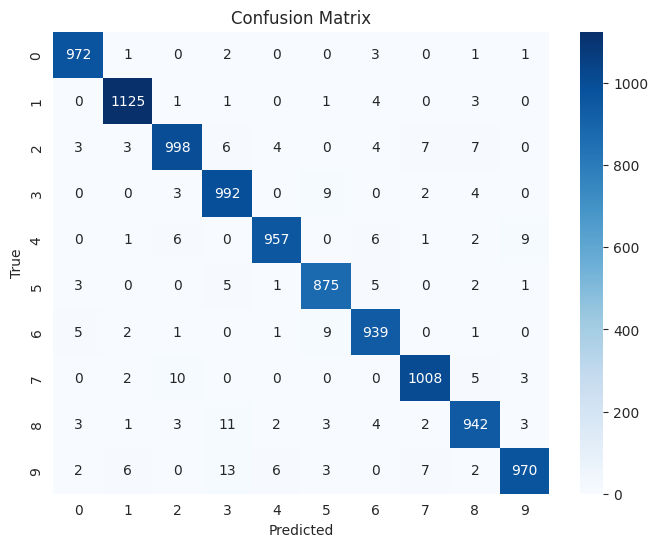

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.98      0.98       892
           6       0.97      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Test accuracy: 0.9778


In [18]:
loss, accuracy = model.evaluate(x_test_nn, y_test_nn)

pred_probs = model.predict(x_test_nn)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test_nn, axis=1)

cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(true_classes, pred_classes))
print(f'Test accuracy: {accuracy:.4f}')

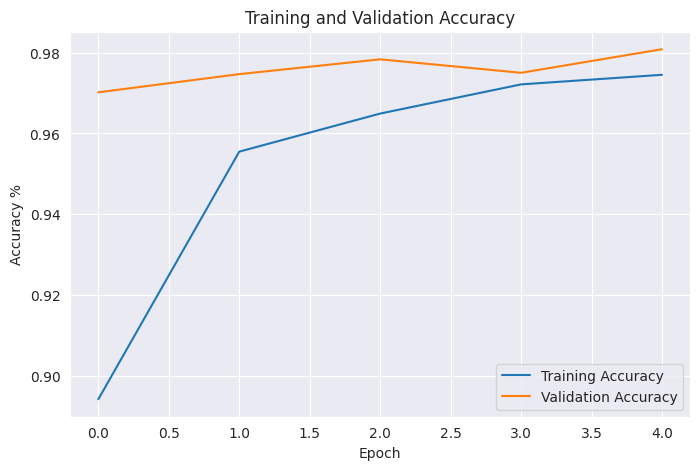

In [19]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

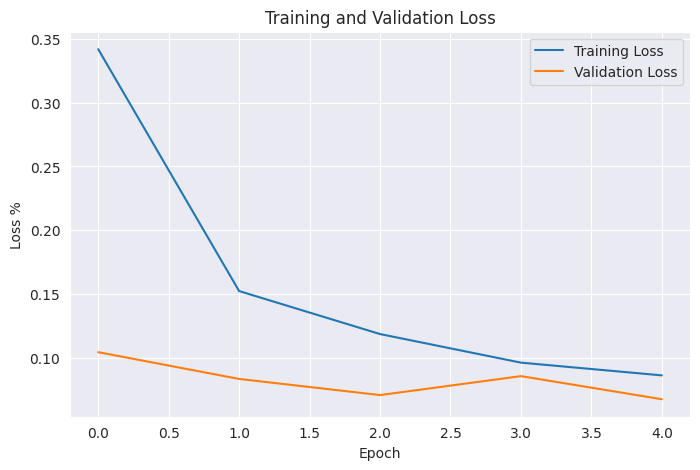

In [20]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss %')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()